In [5]:
from keras.layers import Input, Dense, concatenate, Embedding, ReLU, Dropout, Bidirectional, GRU, Add
from keras import Model

In [6]:
name_vocab_size = 256
calorie_vocab_size = 3
ingredient_vocab_size = 100

In [7]:
name_input = Input(name_vocab_size)
calorie_input = Input(calorie_vocab_size)
ingredient_input = Input(ingredient_vocab_size)

name_encoding = Embedding(name_vocab_size, 256, input_length=256)(name_input)
name_encoding = Bidirectional(GRU(128, return_sequences=True))(name_encoding)
#name_encoding = Model(inputs=name_input, outputs=name_encoding)

calorie_encoding = Embedding(calorie_vocab_size, 100, input_length=1)(calorie_input)
calorie_encoding = Dense(256)(calorie_input)
calorie_encoding = ReLU()(calorie_encoding)
calorie_encoding = Dropout(0.2)(calorie_encoding)
#calorie_encoding = Model(inputs=calorie_input, outputs=calorie_encoding)

ingredient_encoding = Embedding(ingredient_vocab_size, 100, input_length=4)(ingredient_input)
ingredient_encoding = Dense(256)(ingredient_input)
ingredient_encoding = ReLU()(ingredient_encoding)
ingredient_encoding = Dropout(0.2)(ingredient_encoding)
#ingredient_encoding = Model(inputs= ingredient_input, outputs= ingredient_encoding)

added = Add()([name_encoding, calorie_encoding, ingredient_encoding])
out = Dense(128)(added)
encoder = Model(inputs=[name_input, calorie_input, ingredient_input], outputs= out)
#combined = concatenate([name_encoding.output, calorie_encoding.output, ingredient_encoding.output])

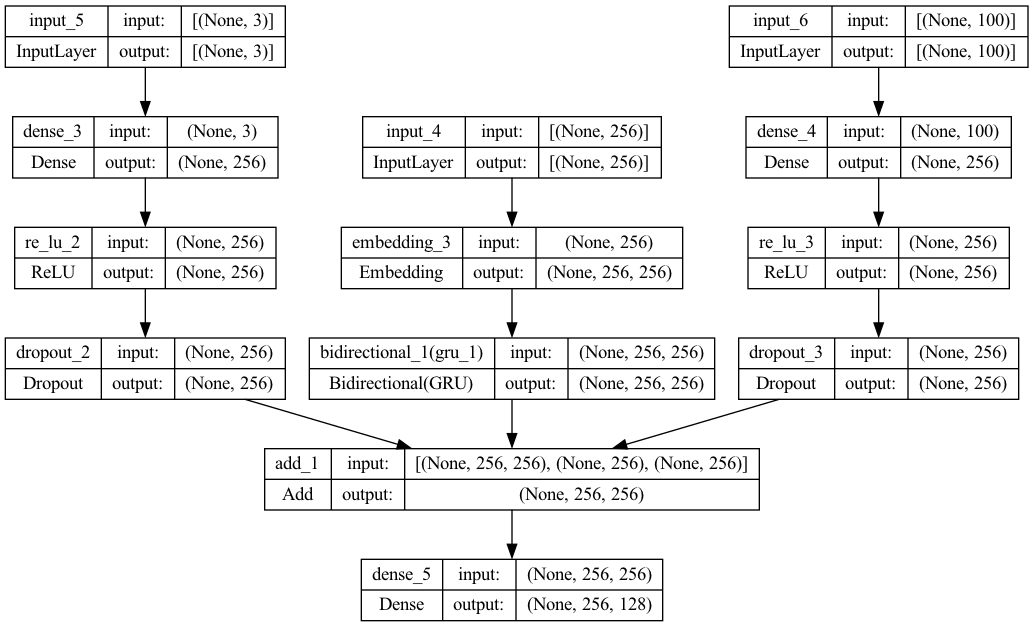

In [8]:
import keras
keras.utils.plot_model(encoder, "encoder.png",show_shapes=True)